<h1 align='center'>DBSCAN clustering algorithm</h1>


Finds core samples of high density and expands clusters from them.

**Density-based spatial clustering of applications with noise (DBSCAN)** is a data clustering algorithm proposed by Martin Ester, Hans-Peter Kriegel, Jörg Sander and Xiaowei Xu in 1996 

It is a density-based clustering non-parametric algorithm: given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away). DBSCAN is one of the most common clustering algorithms and also most cited in scientific literature

![](https://lh3.googleusercontent.com/--gW1dobRJfk/XXoZaUmlyyI/AAAAAAAAhnM/RA2mCenM47cmMtAveDhfkw4PFOyk9MWhwCK8BGAsYHg/s0/2019-09-12.png)
Defined distance (DBSCAN)—Uses a specified distance to separate dense clusters from sparser noise. The DBSCAN algorithm is the fastest of the clustering methods, but is only appropriate if there is a very clear Search Distance to use, and that works well for all potential clusters. This requires that all meaningful clusters have similar densities.


In [3]:
from sklearn.cluster import DBSCAN
import numpy as np
X = np.array([[1, 2], [2, 2], [2, 3],[8, 7], [8, 8], [25, 80]])
clustering = DBSCAN(eps=1, min_samples=2).fit(X)
clustering

DBSCAN(algorithm='auto', eps=1, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=2, n_jobs=None, p=None)

In [5]:
clustering.components_

array([[1, 2],
       [2, 2],
       [2, 3],
       [8, 7],
       [8, 8]])

In [6]:
clustering.eps

1

In [8]:
clustering.labels_

array([ 0,  0,  0,  1,  1, -1], dtype=int64)

In [21]:
clustering.leaf_size

30

In [19]:
clustering.core_sample_indices_

array([0, 1, 2, 3, 4], dtype=int64)

In [16]:
clustering.get_params

<bound method BaseEstimator.get_params of DBSCAN(algorithm='auto', eps=1, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=2, n_jobs=None, p=None)>

In [18]:
clustering.metric

'euclidean'

In [28]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X.shape

(750, 2)

In [29]:
X = StandardScaler().fit_transform(X)
X

array([[ 0.49426097,  1.45106697],
       [-1.42808099, -0.83706377],
       [ 0.33855918,  1.03875871],
       ...,
       [-0.05713876, -0.90926105],
       [-1.16939407,  0.03959692],
       [ 0.26322951, -0.92649949]])

In [30]:
X.shape

(750, 2)

In [31]:
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
db

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)

In [32]:
db.labels_

array([ 0,  1,  0,  2,  0,  1,  1,  2,  0,  0,  1,  1,  1,  2,  1,  0, -1,
        1,  1,  2,  2,  2,  2,  2,  1,  1,  2,  0,  0,  2,  0,  1,  1,  0,
        1,  0,  2,  0,  0,  2,  2,  1,  1,  1,  1,  1,  0,  2,  0,  1,  2,
        2,  1,  1,  2,  2,  1,  0,  2,  1,  2,  2,  2,  2,  2,  0,  2,  2,
        0,  0,  0,  2,  0,  0,  2,  1, -1,  1,  0,  2,  1,  1,  0,  0,  0,
        0,  1,  2,  1,  2,  2,  0,  1,  0,  1, -1,  1,  1,  0,  0,  2,  1,
        2,  0,  2,  2,  2,  2, -1,  0, -1,  1,  1,  1,  1,  0,  0,  1,  0,
        1,  2,  1,  0,  0,  1,  2,  1,  0,  0,  2,  0,  2,  2,  2,  0, -1,
        2,  2,  0,  1,  0,  2,  0,  0,  2,  2, -1,  2,  1, -1,  2,  1,  1,
        2,  2,  2,  0,  1,  0,  1,  0,  1,  0,  2,  2, -1,  1,  2,  2,  1,
        0,  1,  2,  2,  2,  1,  1,  2,  2,  0,  1,  2,  0,  0,  2,  0,  0,
        1,  0,  1,  0,  1,  1,  2,  2,  0,  0,  1,  1,  2,  1,  2,  2,  2,
        2,  0,  2,  0,  2,  2,  0,  2,  2,  2,  0,  0,  1,  1,  1,  2,  2,
        2,  2,  1,  2,  2

In [34]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [35]:
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
labels

array([ 0,  1,  0,  2,  0,  1,  1,  2,  0,  0,  1,  1,  1,  2,  1,  0, -1,
        1,  1,  2,  2,  2,  2,  2,  1,  1,  2,  0,  0,  2,  0,  1,  1,  0,
        1,  0,  2,  0,  0,  2,  2,  1,  1,  1,  1,  1,  0,  2,  0,  1,  2,
        2,  1,  1,  2,  2,  1,  0,  2,  1,  2,  2,  2,  2,  2,  0,  2,  2,
        0,  0,  0,  2,  0,  0,  2,  1, -1,  1,  0,  2,  1,  1,  0,  0,  0,
        0,  1,  2,  1,  2,  2,  0,  1,  0,  1, -1,  1,  1,  0,  0,  2,  1,
        2,  0,  2,  2,  2,  2, -1,  0, -1,  1,  1,  1,  1,  0,  0,  1,  0,
        1,  2,  1,  0,  0,  1,  2,  1,  0,  0,  2,  0,  2,  2,  2,  0, -1,
        2,  2,  0,  1,  0,  2,  0,  0,  2,  2, -1,  2,  1, -1,  2,  1,  1,
        2,  2,  2,  0,  1,  0,  1,  0,  1,  0,  2,  2, -1,  1,  2,  2,  1,
        0,  1,  2,  2,  2,  1,  1,  2,  2,  0,  1,  2,  0,  0,  2,  0,  0,
        1,  0,  1,  0,  1,  1,  2,  2,  0,  0,  1,  1,  2,  1,  2,  2,  2,
        2,  0,  2,  0,  2,  2,  0,  2,  2,  2,  0,  0,  1,  1,  1,  2,  2,
        2,  2,  1,  2,  2

In [39]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

3

In [41]:
n_noise_ = list(labels).count(-1)
n_noise_

18

In [43]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels,
                                           average_method='arithmetic'))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))


Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


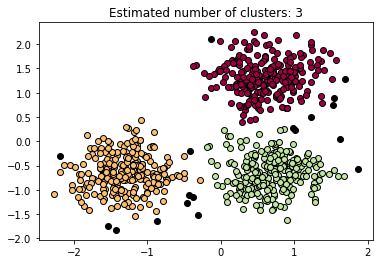

In [48]:
# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

### Advantages
1. DBSCAN does not require one to specify the number of clusters in the data a priori, as opposed to k-means.
2. DBSCAN can find arbitrarily shaped clusters. It can even find a cluster completely surrounded by (but not connected to) a different cluster. Due to the MinPts parameter, the so-called single-link effect (different clusters being connected by a thin line of points) is reduced.
3. DBSCAN has a notion of noise, and is robust to outliers.
4. DBSCAN requires just two parameters and is mostly insensitive to the ordering of the points in the database. (However, points sitting on the edge of two different clusters might swap cluster membership if the ordering of the points is changed, and the cluster assignment is unique only up to isomorphism.)
5. DBSCAN is designed for use with databases that can accelerate region queries, e.g. using an R* tree.
6 .The parameters minPts and ε can be set by a domain expert, if the data is well understood.


#### Disadvantages

1. DBSCAN is not entirely deterministic: border points that are reachable from more than one cluster can be part of either cluster, depending on the order the data are processed. For most data sets and domains, this situation does not arise often and has little impact on the clustering result:[5] both on core points and noise points, DBSCAN is deterministic. DBSCAN*[7] is a variation that treats border points as noise, and this way achieves a fully deterministic result as well as a more consistent statistical interpretation of density-connected components.
2. The quality of DBSCAN depends on the distance measure used in the function regionQuery(P,ε). The most common distance metric used is Euclidean distance. Especially for high-dimensional data, this metric can be rendered almost useless due to the so-called "Curse of dimensionality", making it difficult to find an appropriate value for ε. This effect, however, is also present in any other algorithm based on Euclidean distance.
3. DBSCAN cannot cluster data sets well with large differences in densities, since the minPts-ε combination cannot then be chosen appropriately for all clusters.[8]
If the data and scale are not well understood, choosing a meaningful distance threshold ε can be difficult.